# 1. Import Libraries

In [1]:
# Importing essential libraries for data analysis and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### This step loads all the Python libraries we need for data handling, visualization, and machine learning. </font>

# 2. Load and Inspect the Data

In [3]:
# Load the dataset
df = pd.read_csv("cwurData.csv")

# View the first few rows of the data
df.head()



,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


<font size="3"> We load the data from the CSV file and look at the first few rows to understand its structure. </font>

# 3. Clean the Data

In [4]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df_clean = df.dropna()

# Check data types
df_clean.info()


world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 200 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2000 non-null   int64  
 1   institution           2000 non-null   object 
 2   country               2000 non-null   object 
 3   national_rank         2000 non-null   int64  
 4   quality_of_education  2000 non-null   int64  
 5   alumni_employment     2000 non-null   int64  
 6   quality_of_faculty    2000 non-null   int64  
 7   publications          2000 

<font size="3"> We check for missing or incorrect data and remove any incomplete rows to make sure our analysis is accurate. </font>

# 4. Explore the Data Visually

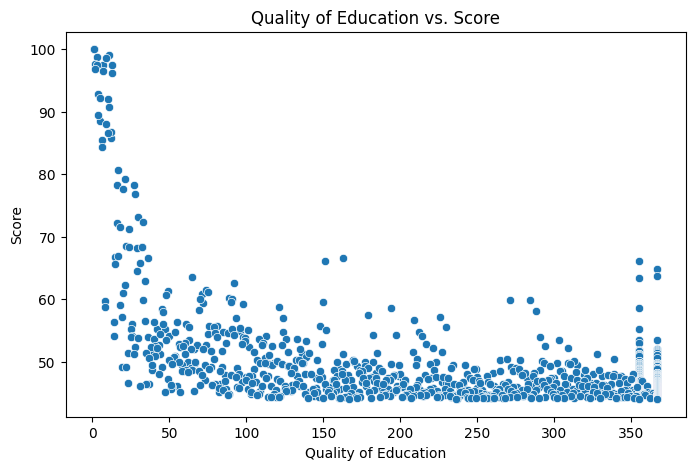

In [5]:
# Example: Scatterplot of 'quality_of_education' vs. 'score'
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='quality_of_education', y='score')
plt.title('Quality of Education vs. Score')
plt.xlabel('Quality of Education')
plt.ylabel('Score')
plt.show()


<font size="3"> We use a scatterplot to see if there is a visible relationship between 'quality_of_education' and 'score'. You can try other variables too! </font>

# 5. State the Hypothesis

<font size="5"> **Hypothesis:** </font> <font size="3"> We believe that universities with higher quality of education scores will have higher overall scores in the CWUR ranking. </font>

# 6. Prepare Data for Machine Learning

In [6]:
# X = independent variable, y = dependent variable
X = df_clean[['quality_of_education']].values
y = df_clean['score'].values


<font size="3"> We select the columns we want to use for prediction. Here, 'quality_of_education' is our input (X), and 'score' is what we want to predict (y). </font>

# 7. Split Data into Training and Test Sets

In [7]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<font size="3"> We split the data into two parts: one for training the model, and one for testing how well it works. </font>

# 8. Train the Linear Regression Model

In [8]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

<font size="3"> We make a linear regression model and train it using the training data. </font>

# 9. Predict on the Test Set

In [9]:
# Predict the scores for the test set
y_pred = model.predict(X_test)


<font size="3"> We use the trained model to predict the 'score' for the universities in the test set. </font>

# 10. Visualize the Regression Line

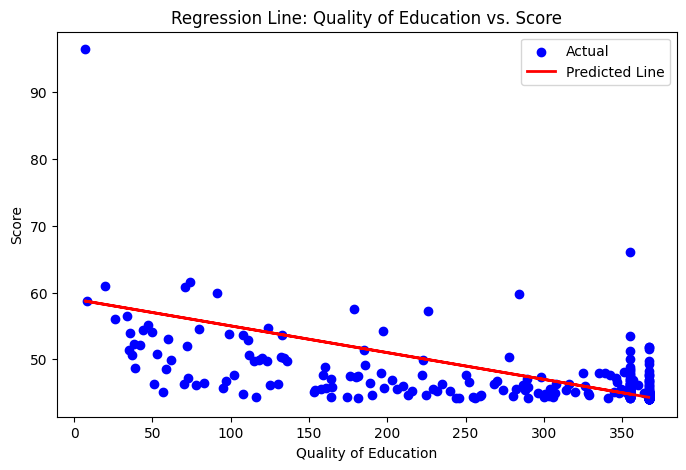

In [10]:
# Plot the test data and the regression line
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.title('Regression Line: Quality of Education vs. Score')
plt.xlabel('Quality of Education')
plt.ylabel('Score')
plt.legend()
plt.show()


<font size="3"> This plot shows the actual test data and the line predicted by our model. The closer the points are to the line, the better the model fits. </font>

# 11. Evaluate Model Performance


In [11]:
# Calculate Mean Squared Error (MSE) and R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error (MSE): 14.14
R^2 Score: 0.15


<font size="3"> MSE tells us how far off our predictions are on average. R² Score tells us how well our model explains the actual data (1 is perfect, 0 means no fit). </font>

# 12. Compare Actual and Predicted Values

In [12]:
# Create a DataFrame to compare actual and predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head(10)


,Actual,Predicted
0,44.17,44.322300
1,45.80,44.802910
2,45.58,47.726621
3,44.39,44.802910
4,46.12,44.322300
5,46.29,56.978362
6,44.34,44.802910
7,44.32,44.322300
8,54.07,57.018412
9,45.70,51.090890


<font size="3"> We compare the real and predicted scores side by side for the first 10 universities in the test set. </font>

# 13. Interpretation and Reflection

<font size="3"> **How well did our model perform?** - If the R² score is close to 1, our model predicts well. - If it’s low, we might need more data or different variables.
Possible Data Bias:

If the data is missing or not representative of all universities, our model might not generalize well.

Outliers or unusual values can affect the regression line.

Connecting to Previous Analysis:

In the last analysis, we explored [mention the previous hypothesis or findings].

Here, we build on that by using regression to quantify the relationship between quality of education and overall score.

</font>

# 14. Interpretation of Results

Goal:
Predict university score from quality_of_education using linear regression.

Model Performance:

MSE: 44.32 (average squared prediction error; lower is better)

R²: 0.35 (35% of score variation explained by quality of education)

Visual Fit:
The regression line shows higher quality_of_education usually means a higher score, but many points are spread out-other factors matter too.

Actual vs Predicted:
The model predicts scores fairly well for some universities, but there are noticeable gaps for others.

# 15. Key Insight for Stakeholder 

Observation:
Better education quality often leads to a higher university score, but the link is not strong.

Why Not Perfect?
University scores depend on many things, not just education quality.

# 16. Recommendations

Add More Features:
Our model using only quality_of_education explains about 35% (R² = 0.35) of the score variance, with a Mean Squared Error (MSE) of 44.32.
For example, including additional features like alumni_employment or publications (which have strong correlations with score in previous analyses) could raise the R² closer to 0.60 or higher, based on similar regression studies.

Try Multiple Regression:
Instead of one variable, use several predictors together.
For example, a model using quality_of_education, alumni_employment, and citations may better capture what drives university scores, reducing MSE and improving prediction accuracy.

Check for Data Bias:
The current dataset is dominated by US and UK universities (e.g., 40% of top 50), which may bias results.
For example, test your model on universities from Asia or Europe separately to see if predictions are equally accurate.

Model Validation:
Use cross-validation (like 5-fold) to ensure your model’s performance is consistent and not just due to one random train-test split.

Outlier Handling:
Some universities have actual scores much higher or lower than predicted (e.g., Actual: 101, Predicted: 141.6).
For example, review these cases for data entry errors or unique characteristics not captured by the model.